 # Pizza VS Steak Classification using CNN
For example, you might want to:

* Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
* Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)
* Dataset:- https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import sklearn
import tensorflow as tf
print(tf.__version__)
%matplotlib inline
plt.style.use('default')

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

2.9.2
GPU available (YESSSS!!!!!)


### Getting Data

In [2]:
!ls drive/MyDrive/Datasets/pizza_steak/pizza_steak

test  train


In [3]:
!ls drive/MyDrive/Datasets/pizza_steak/pizza_steak/train

pizza  steak


In [4]:
!ls drive/MyDrive/Datasets/pizza_steak/pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os 

# Walk through directory and check the number of files present in the folder 
for dirpath, dirnames, filenames in os.walk("drive/MyDrive/Datasets/pizza_steak/pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'drive/MyDrive/Datasets/pizza_steak/pizza_steak'.
There are 2 directories and 0 images in 'drive/MyDrive/Datasets/pizza_steak/pizza_steak/test'.
There are 0 directories and 250 images in 'drive/MyDrive/Datasets/pizza_steak/pizza_steak/test/steak'.
There are 0 directories and 250 images in 'drive/MyDrive/Datasets/pizza_steak/pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'drive/MyDrive/Datasets/pizza_steak/pizza_steak/train'.
There are 0 directories and 750 images in 'drive/MyDrive/Datasets/pizza_steak/pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'drive/MyDrive/Datasets/pizza_steak/pizza_steak/train/steak'.


In [6]:
!ls -la drive/MyDrive/Datasets/pizza_steak

total 8
drwx------ 4 root root 4096 Nov 20 12:27  pizza_steak
drwx------ 2 root root 4096 Dec  8 16:16 'Prediction Testing Images'


In [7]:
# another way to find number ofimages in file
num_steak_images_train = len(os.listdir("drive/MyDrive/Datasets/pizza_steak/pizza_steak/train/steak/"))
num_steak_images_train


750

In [8]:
# Get the classnames Programmatically 
import pathlib
data_dir = pathlib.Path("drive/MyDrive/Datasets/pizza_steak/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from the sub directory
print(class_names)   # Class names are the dirfferent folder of pizza or steak

['pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

In [9]:
# Let's Vizualize the images 
import matplotlib.image as mpimg 
import random

def view_random_image(target_dir , target_class):
  # Setup the Target Directory
  target_folder = target_dir + target_class

  # Get the random image path 
  random_image = random.sample(os.listdir(target_folder) , 1)
  print(random_image)

  # Read in the image and plot it using the matlotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image width , height and color channels 

  return img

['3906901.jpg']
Image shape: (512, 288, 3)


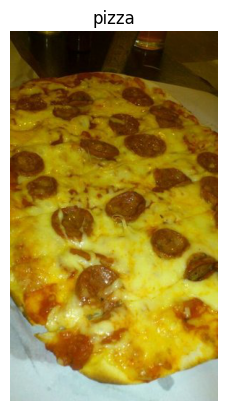

In [10]:
# View a random image from the training dataset 
img = view_random_image(target_dir = "drive/MyDrive/Datasets/pizza_steak/pizza_steak/train/" , target_class = "pizza")

In [11]:
# check our big tensor of the image 
tf.constant(img)

<tf.Tensor: shape=(512, 288, 3), dtype=uint8, numpy=
array([[[ 33,  23,   0],
        [ 33,  23,   0],
        [ 34,  22,   0],
        ...,
        [ 43,  28,   0],
        [ 42,  27,   0],
        [ 43,  28,   0]],

       [[ 34,  24,   0],
        [ 34,  24,   0],
        [ 35,  23,   0],
        ...,
        [ 45,  30,   0],
        [ 45,  30,   0],
        [ 46,  31,   0]],

       [[ 33,  23,   0],
        [ 34,  22,   0],
        [ 34,  22,   0],
        ...,
        [ 46,  31,   0],
        [ 46,  31,   0],
        [ 47,  32,   1]],

       ...,

       [[177, 198, 191],
        [176, 195, 189],
        [177, 196, 190],
        ...,
        [173, 184, 176],
        [172, 183, 175],
        [171, 182, 174]],

       [[177, 196, 190],
        [176, 195, 189],
        [177, 196, 190],
        ...,
        [173, 184, 178],
        [172, 183, 177],
        [171, 182, 174]],

       [[176, 195, 189],
        [175, 194, 188],
        [176, 195, 189],
        ...,
        [173, 184, 17

In [12]:
# Normalization of the Tensorflow Images which is between 0 to 1
img / 255

array([[[0.12941176, 0.09019608, 0.        ],
        [0.12941176, 0.09019608, 0.        ],
        [0.13333333, 0.08627451, 0.        ],
        ...,
        [0.16862745, 0.10980392, 0.        ],
        [0.16470588, 0.10588235, 0.        ],
        [0.16862745, 0.10980392, 0.        ]],

       [[0.13333333, 0.09411765, 0.        ],
        [0.13333333, 0.09411765, 0.        ],
        [0.1372549 , 0.09019608, 0.        ],
        ...,
        [0.17647059, 0.11764706, 0.        ],
        [0.17647059, 0.11764706, 0.        ],
        [0.18039216, 0.12156863, 0.        ]],

       [[0.12941176, 0.09019608, 0.        ],
        [0.13333333, 0.08627451, 0.        ],
        [0.13333333, 0.08627451, 0.        ],
        ...,
        [0.18039216, 0.12156863, 0.        ],
        [0.18039216, 0.12156863, 0.        ],
        [0.18431373, 0.1254902 , 0.00392157]],

       ...,

       [[0.69411765, 0.77647059, 0.74901961],
        [0.69019608, 0.76470588, 0.74117647],
        [0.69411765, 0

## An end-to-end example
We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the Random Seed 
tf.random.set_seed(42)

# Preprocess the Data(get the values in 0 to 1) or Normalization 
train_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator(rescale = 1/ 255)

# Setup the paths to directories
train_dir = "/content/drive/MyDrive/Datasets/pizza_steak/pizza_steak/train"
test_dir = "/content/drive/MyDrive/Datasets/pizza_steak/pizza_steak/test"


# Import Data from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(
    directory = train_dir , 
    batch_size = 32, 
    target_size = (224 , 224), 
    class_mode = "binary",
    seed = 42,
)

valid_data = valid_datagen.flow_from_directory(
    directory = test_dir,
    batch_size = 32,
    target_size = (224 , 224),
    class_mode = "binary",
    seed = 42,
)

# Build a CNN Model 
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = "relu", input_shape = (224 , 224 , 3),),
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPool2D( pool_size= 2 , padding = "valid"),
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPool2D( pool_size= 2 , padding = "valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = "sigmoid"),
])

# compile the model 
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.Accuracy(),
                )

# Fit the model 
history_1 = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 952s 20s/step - loss: 0.5613 - accuracy: 0.0000e+00 - val_loss: 0.4149 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4285 - accuracy: 0.0000e+00 - val_loss: 0.3745 - val_accuracy: 0.0000e+00
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3895 - accuracy: 0.0000e+00 - val_loss: 0.3618 - val_accuracy: 0.0000e+00
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3585 - accuracy: 0.0000e+00 - val_loss: 0.4693 - val_accuracy: 0.0000e+00
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3507 - accuracy: 0.0000e+00 - val_loss: 0.2897 - val_accuracy: 0.0000e+00


In [14]:
# Get the modal Summary 
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Creating many other Models with Good Accuracy

In [15]:
# Model 2
# Set the random seed 
tf.random.set_seed(42)

# Create Model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid),
])

# Compile the model 
model_2.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = tf.keras.metrics.Accuracy(),
)

# Fit the model
history_2 = model_2.fit(
    train_data, # using same training data
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Epoch 1/5
47/47 [==============================] - 11s 237ms/step - loss: 0.7208 - accuracy: 0.0000e+00 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 14s 294ms/step - loss: 0.6966 - accuracy: 0.0000e+00 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


### Increasing the number of layers in next model 
as Model 2 performed very bad

In [17]:
# Model 3 
# Setup the random seed 
tf.random.set_seed(42)

# Create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid),
])

# Compile the model 
model_3.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = tf.keras.metrics.Accuracy(),
)

# Fit the model 
history_3 = model_3.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Epoch 1/5
47/47 [==============================] - 11s 230ms/step - loss: 2.2285 - accuracy: 0.0273 - val_loss: 3.2627 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 1.1567 - accuracy: 0.0040 - val_loss: 0.9610 - val_accuracy: 0.0000e+00
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.7431 - accuracy: 0.0000e+00 - val_loss: 0.9781 - val_accuracy: 0.0000e+00
Epoch 4/5
47/47 [==============================] - 10s 224ms/step - loss: 0.8398 - accuracy: 0.0020 - val_loss: 0.8896 - val_accuracy: 0.0000e+00
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.5995 - accuracy: 6.6667e-04 - val_loss: 0.9162 - val_accuracy: 0.0060


In [18]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


again very worse model 

## Binary Classification : Let's Break it Down to Every Step 

### 1. Import and become one with the data

['1324791.jpg']
Image shape: (384, 512, 3)
['333985.jpg']
Image shape: (512, 382, 3)


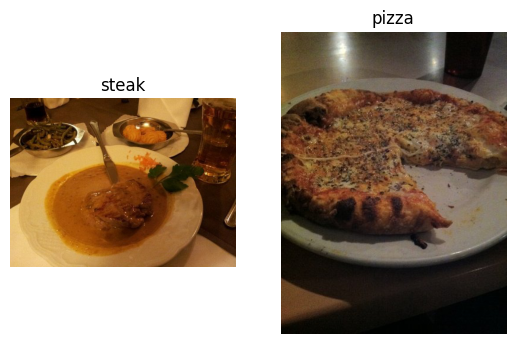

In [19]:
# Vizualize the data 
plt.figure()
plt.subplot(1 ,2 ,1)
steak_img = view_random_image("/content/drive/MyDrive/Datasets/pizza_steak/pizza_steak/train/" , "steak")
plt.subplot(1 ,2 ,2)
pizza_img = view_random_image("/content/drive/MyDrive/Datasets/pizza_steak/pizza_steak/train/" , "pizza")


### 2. Preprocess the Data (prepare it for a model)

In [20]:
# Define training and test directory paths
train_dir = "/content/drive/MyDrive/Datasets/pizza_steak/pizza_steak/train/"
test_dir = "/content/drive/MyDrive/Datasets/pizza_steak/pizza_steak/test/"


Our next step is to turn our data into `batches.`

A `batch` is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

In [21]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [24]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [25]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3 & 4 . Create a model (start with a baseline) 
 ### Compile Model 
 Since we're working on a binary classification problem (pizza vs. steak), the loss function we're using is `'binary_crossentropy'`, if it was multi-class, we might use something like `'categorical_crossentropy'`.

### Fit a model
Our model is compiled, time to fit it.

You'll notice two new parameters here:

* `steps_per_epoch`  - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [26]:
# Model No.4 

# Set the random seed 
tf.random.set_seed(42)

# Create Model 
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, strides = 1, padding = "valid", activation = tf.keras.activations.relu, input_shape = (224, 224, 3),),
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu,),
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu, ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid)
])

# Compile the model 
model_4.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = 'Accuracy'
)

# Fit the model 
history_4 = model_4.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
)

Epoch 1/10
47/47 [==============================] - 12s 246ms/step - loss: 0.7023 - Accuracy: 0.6847 - val_loss: 0.4653 - val_Accuracy: 0.7880
Epoch 2/10
47/47 [==============================] - 11s 238ms/step - loss: 0.4462 - Accuracy: 0.7920 - val_loss: 0.3876 - val_Accuracy: 0.8380
Epoch 3/10
47/47 [==============================] - 11s 240ms/step - loss: 0.3569 - Accuracy: 0.8427 - val_loss: 0.3464 - val_Accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 11s 238ms/step - loss: 0.2263 - Accuracy: 0.9207 - val_loss: 0.4546 - val_Accuracy: 0.7980
Epoch 5/10
47/47 [==============================] - 11s 241ms/step - loss: 0.1234 - Accuracy: 0.9587 - val_loss: 0.3846 - val_Accuracy: 0.8480
Epoch 6/10
47/47 [==============================] - 11s 239ms/step - loss: 0.0486 - Accuracy: 0.9887 - val_loss: 0.4826 - val_Accuracy: 0.8100
Epoch 7/10
47/47 [==============================] - 11s 237ms/step - loss: 0.0299 - Accuracy: 0.9933 - val_loss: 0.5177 - val_Accuracy: 0.8340

In [27]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 5. Evaluating Our Model

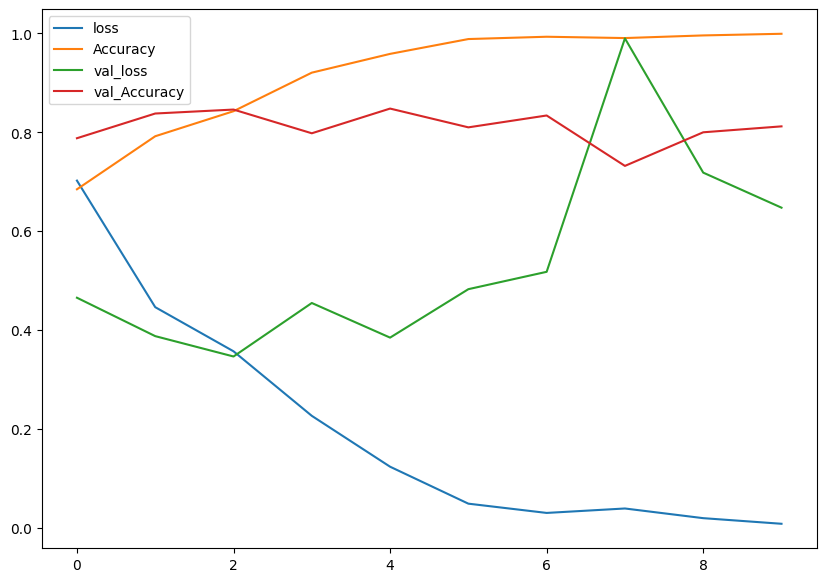

In [28]:
  # Plot the Training Curves 
  pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [29]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['Accuracy']
  val_accuracy = history.history['val_Accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_Accuracy')
  plt.plot(epochs, val_accuracy, label='val_Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

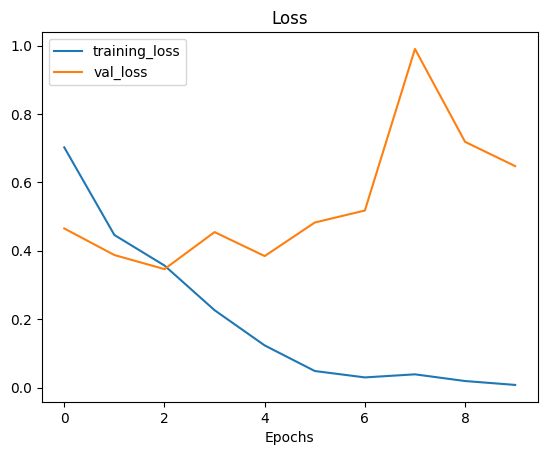

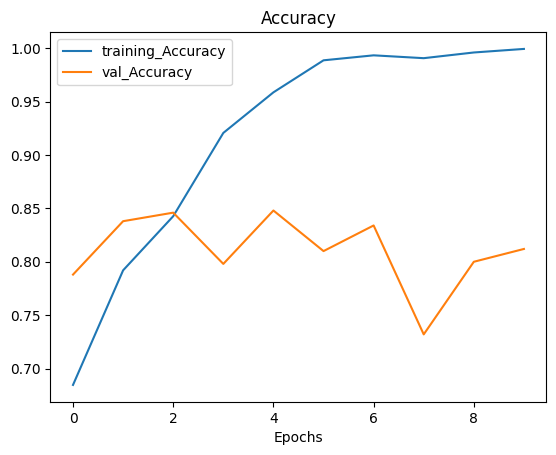

In [30]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)


The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

### 6. Adjust the model parameters to Reduce Overfitting

* `Why is reducing overfitting important?`

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

In [31]:
# Model 5
# Set the random seed 
tf.random.set_seed(42)

# Create the model 
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu, input_shape = (224, 224, 3),),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid )
])

# Compile the model 
model_5.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = 'Accuracy',
)

# Fit the model 
history_5 = model_5.fit(train_data,
                        epochs= 10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
47/47 [==============================] - 12s 233ms/step - loss: 0.5831 - Accuracy: 0.7067 - val_loss: 0.4449 - val_Accuracy: 0.7960
Epoch 2/10
47/47 [==============================] - 11s 230ms/step - loss: 0.4568 - Accuracy: 0.7867 - val_loss: 0.3628 - val_Accuracy: 0.8320
Epoch 3/10
47/47 [==============================] - 11s 227ms/step - loss: 0.4236 - Accuracy: 0.8013 - val_loss: 0.3300 - val_Accuracy: 0.8640
Epoch 4/10
47/47 [==============================] - 11s 228ms/step - loss: 0.3849 - Accuracy: 0.8253 - val_loss: 0.3483 - val_Accuracy: 0.8380
Epoch 5/10
47/47 [==============================] - 11s 227ms/step - loss: 0.3709 - Accuracy: 0.8393 - val_loss: 0.3472 - val_Accuracy: 0.8480
Epoch 6/10
47/47 [==============================] - 11s 227ms/step - loss: 0.3602 - Accuracy: 0.8400 - val_loss: 0.2997 - val_Accuracy: 0.8800
Epoch 7/10
47/47 [==============================] - 11s 228ms/step - loss: 0.3516 - Accuracy: 0.8587 - val_loss: 0.3018 - val_Accuracy: 0.8820

In [32]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

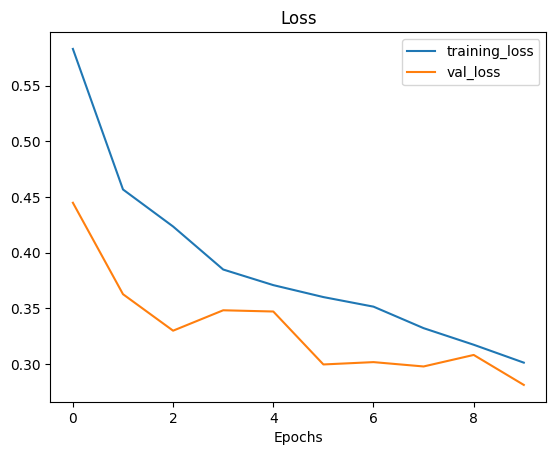

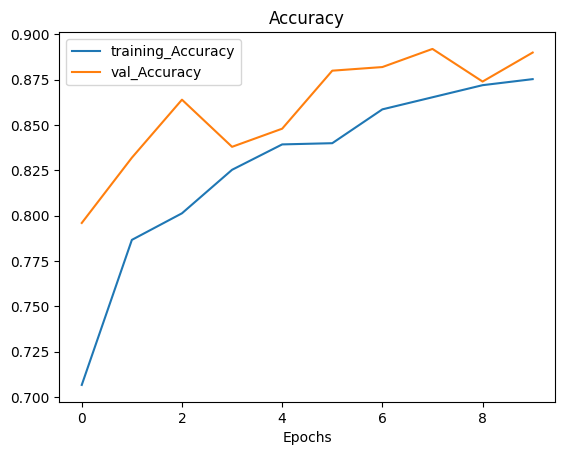

In [33]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

### Reducing Overfitting by Data Augmentation

`Data augmentation` is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

In [34]:
# Create the Image Data Generator trainig instance with data augmentation 
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
    shear_range=0.2, # shear the image
    zoom_range=0.2, # zoom into the image
    width_shift_range=0.2, # shift the image width ways
    height_shift_range=0.2, # shift the image height ways
    horizontal_flip=True # flip the image on the horizontal axis
)


# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255)

let's Test the Data Augmentation

In [35]:
# Import data and augment it from training directory
print("Augmented Training Images: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    shuffle = False,
)

# Create non-augmented data batches
print("Non-Augmented Training Images: ")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    shuffle = False,
)

print("Unchanged Test Images: ")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224 , 224),
    batch_size = 32,
    class_mode=  "binary",
)

Augmented Training Images: 
Found 1500 images belonging to 2 classes.
Non-Augmented Training Images: 
Found 1500 images belonging to 2 classes.
Unchanged Test Images: 
Found 500 images belonging to 2 classes.


In [36]:
# Get data batch sample
images , labels = train_data.next()
augmented_images , augmented_labels = train_data_augmented.next()

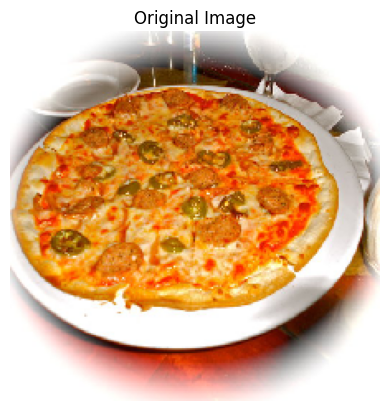

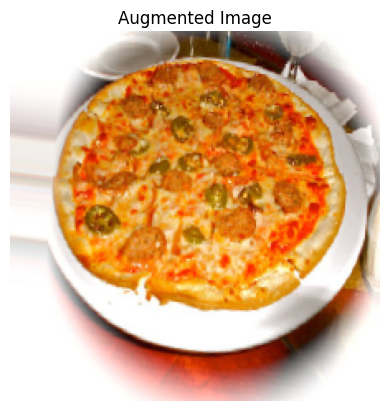

In [37]:
# Show the original image and the augmented image 
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

In [38]:
# Model 6
# Set the random seed 
tf.random.set_seed(42)
# Create the model 
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu, input_shape = (224, 224, 3),),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D( filters = 10 , kernel_size = 3, activation = tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D( filters = 10 , kernel_size = 3, activation = tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid),
])

# Compile the model 
model_6.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = "Accuracy",
)

# Fit the model 
history_6 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data),
)

Epoch 1/5
47/47 [==============================] - 24s 502ms/step - loss: 0.7110 - Accuracy: 0.4700 - val_loss: 0.6874 - val_Accuracy: 0.5680
Epoch 2/5
47/47 [==============================] - 23s 496ms/step - loss: 0.6968 - Accuracy: 0.4793 - val_loss: 0.6846 - val_Accuracy: 0.6780
Epoch 3/5
47/47 [==============================] - 23s 501ms/step - loss: 0.6798 - Accuracy: 0.5953 - val_loss: 0.6178 - val_Accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 23s 501ms/step - loss: 0.6509 - Accuracy: 0.6360 - val_loss: 0.5734 - val_Accuracy: 0.6640
Epoch 5/5
47/47 [==============================] - 23s 498ms/step - loss: 0.6961 - Accuracy: 0.4800 - val_loss: 0.6923 - val_Accuracy: 0.5840


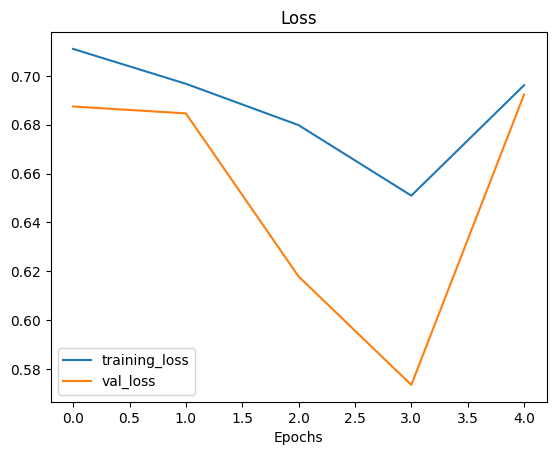

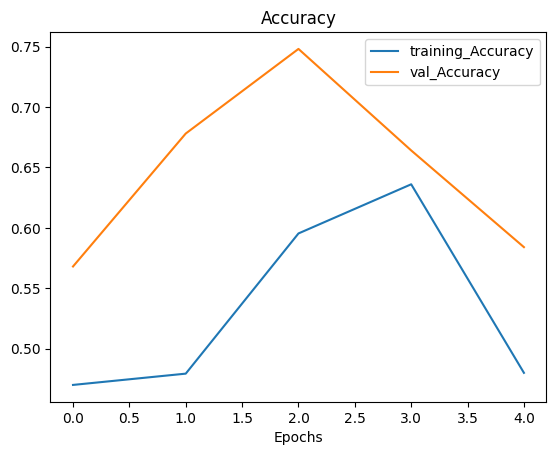

In [39]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

Let's see what happens when we shuffle the augmented training data.

In [40]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True
                                                                            ) 

Found 1500 images belonging to 2 classes.


In [41]:
# Create the model 7
# set the random seed 
tf.random.set_seed(42)

# Create model 7
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu, input_shape = (224, 224, 3),),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D( filters = 10 , kernel_size = 3, activation = tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D( filters = 10 , kernel_size = 3, activation = tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid),
])
# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= "Accuracy"
                )

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6282 - Accuracy: 0.6567 - val_loss: 0.4836 - val_Accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 23s 498ms/step - loss: 0.5381 - Accuracy: 0.7313 - val_loss: 0.4397 - val_Accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 23s 498ms/step - loss: 0.4960 - Accuracy: 0.7633 - val_loss: 0.3456 - val_Accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 23s 498ms/step - loss: 0.4754 - Accuracy: 0.7840 - val_loss: 0.3529 - val_Accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 29s 626ms/step - loss: 0.4546 - Accuracy: 0.7967 - val_loss: 0.3829 - val_Accuracy: 0.8300


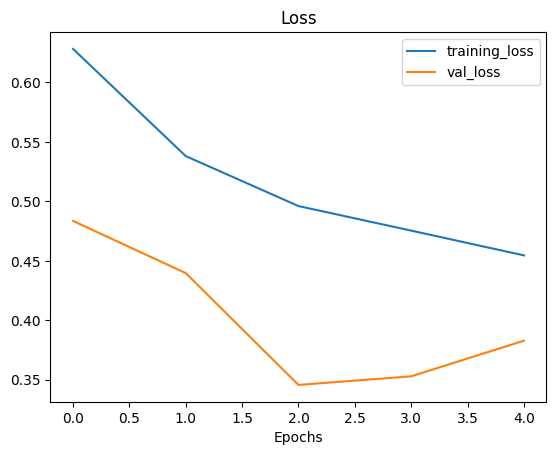

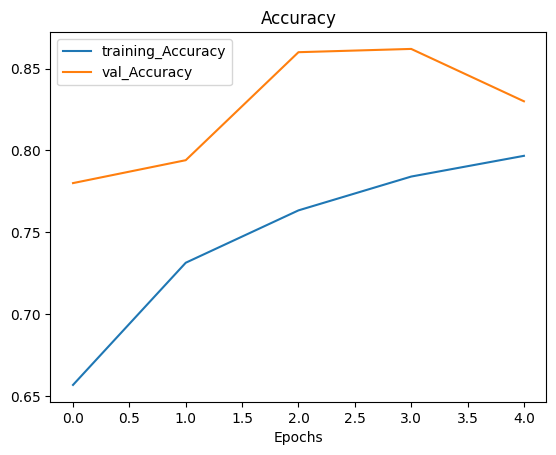

In [42]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

## 7. Repeat until satisified

In [43]:
# Model 8 
# Set Random seed 
tf.random.set_seed(42)

# Create model 
model_8 = tf.keras.Sequential([
      tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu, input_shape = (224, 224, 3),),
      tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu),
      tf.keras.layers.Conv2D( filters = 10, kernel_size = 3, activation = tf.keras.activations.relu),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid),
])

# Compile the model 
model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = "Accuracy",
)

# Fit the model 
history_8 = model_8.fit(train_data_augmented_shuffled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 514ms/step - loss: 0.6120 - Accuracy: 0.6593 - val_loss: 0.4254 - val_Accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 26s 559ms/step - loss: 0.5029 - Accuracy: 0.7553 - val_loss: 0.3658 - val_Accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 34s 715ms/step - loss: 0.4839 - Accuracy: 0.7720 - val_loss: 0.3608 - val_Accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 28s 603ms/step - loss: 0.4495 - Accuracy: 0.7853 - val_loss: 0.3169 - val_Accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 28s 588ms/step - loss: 0.4526 - Accuracy: 0.7973 - val_loss: 0.3330 - val_Accuracy: 0.8640


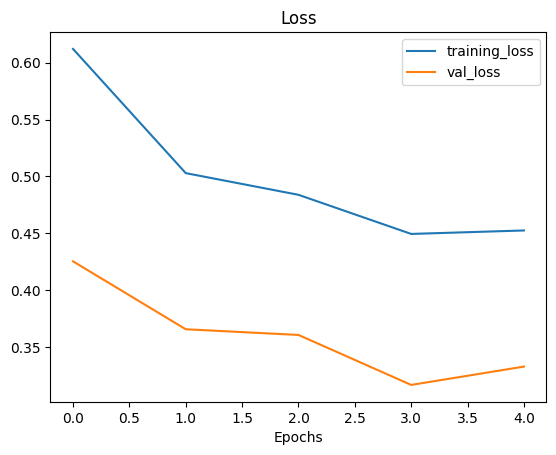

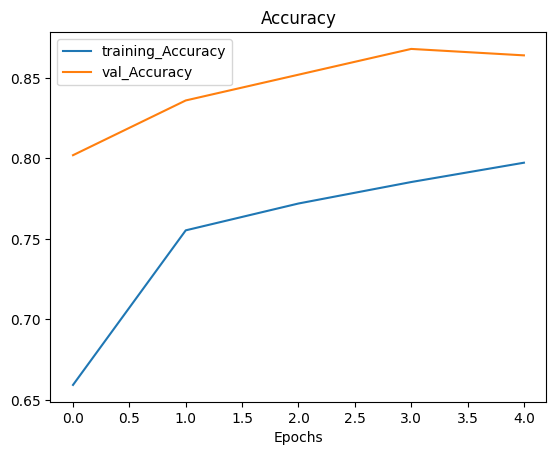

In [44]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

## Making a prediction with our trained model

In [45]:
print(class_names)

['pizza' 'steak']


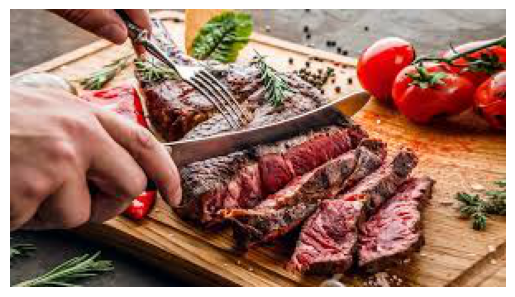

In [46]:
predict_img_1 = mpimg.imread("/content/drive/MyDrive/Datasets/pizza_steak/Prediction Testing Images/images (1).jpeg")
plt.imshow(predict_img_1)
plt.axis(False);

In [47]:
# Check the shape of our image 
predict_img_1.shape

(168, 300, 3)

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.

In [48]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape = 224):
  # Read in target file
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)
  # Resize the image 
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image
  img = img/255
  return img

In [49]:
# Load in and preprocess our custom image
steak = load_and_prep_image("/content/drive/MyDrive/Datasets/pizza_steak/Prediction Testing Images/images (1).jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5183824 , 0.46348038, 0.42034313],
        [0.55514705, 0.5002451 , 0.45710784],
        [0.5619748 , 0.50707287, 0.46393558],
        ...,
        [0.68056715, 0.66880244, 0.64135146],
        [0.6628849 , 0.6511202 , 0.6236692 ],
        [0.6418768 , 0.6301121 , 0.60266113]],

       [[0.5244879 , 0.46958598, 0.4264487 ],
        [0.55265236, 0.49775034, 0.4546131 ],
        [0.5633097 , 0.5084078 , 0.4652705 ],
        ...,
        [0.700175  , 0.6884103 , 0.6609593 ],
        [0.6812891 , 0.6695244 , 0.6420734 ],
        [0.65903366, 0.64726895, 0.619818  ]],

       [[0.53450626, 0.47960436, 0.4364671 ],
        [0.5496324 , 0.49473038, 0.45159313],
        [0.56344104, 0.5085391 , 0.4654018 ],
        ...,
        [0.71341026, 0.70164555, 0.6741946 ],
        [0.69452435, 0.68275964, 0.65530866],
        [0.672269  , 0.6605043 , 0.6330533 ]],

       ...,

       [[0.31188726, 0.33541667, 0.29487044],
        [0.25

In [50]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.5183824 , 0.46348038, 0.42034313],
         [0.55514705, 0.5002451 , 0.45710784],
         [0.5619748 , 0.50707287, 0.46393558],
         ...,
         [0.68056715, 0.66880244, 0.64135146],
         [0.6628849 , 0.6511202 , 0.6236692 ],
         [0.6418768 , 0.6301121 , 0.60266113]],

        [[0.5244879 , 0.46958598, 0.4264487 ],
         [0.55265236, 0.49775034, 0.4546131 ],
         [0.5633097 , 0.5084078 , 0.4652705 ],
         ...,
         [0.700175  , 0.6884103 , 0.6609593 ],
         [0.6812891 , 0.6695244 , 0.6420734 ],
         [0.65903366, 0.64726895, 0.619818  ]],

        [[0.53450626, 0.47960436, 0.4364671 ],
         [0.5496324 , 0.49473038, 0.45159313],
         [0.56344104, 0.5085391 , 0.4654018 ],
         ...,
         [0.71341026, 0.70164555, 0.6741946 ],
         [0.69452435, 0.68275964, 0.65530866],
         [0.672269  , 0.6605043 , 0.6330533 ]],

        ...,

        [[0.31188726, 0.33541667, 

In [51]:
# Let's Make Prediction 
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 201ms/step


array([[0.83627135]], dtype=float32)

In [52]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [53]:
# Creating the function to predict and plot 
def pred_and_plot(model , filename , class_name):
  # Import the target image and process it
  img = load_and_prep_image(filename)
  # Make prediction
  pred = model.predict(tf.expand_dims(img , axis = 0))
  # Get the predicted class 
  pred_class = class_names[int(tf.round(pred)[0][0])]
  # Plot the image and predicted class 
  plt.imshow(img)
  plt.title(f"Predicted: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


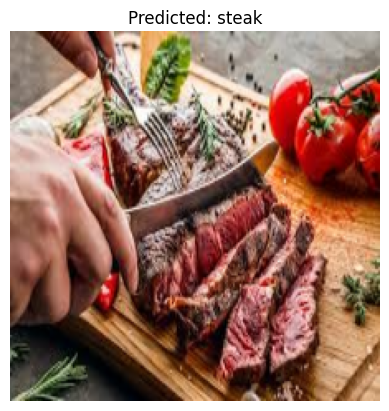

In [54]:
# Test Our Model on a Custom image
pred_and_plot(model_8 , "/content/drive/MyDrive/Datasets/pizza_steak/Prediction Testing Images/images (1).jpeg" , class_names)

1/1 [==============================] - 0s 15ms/step


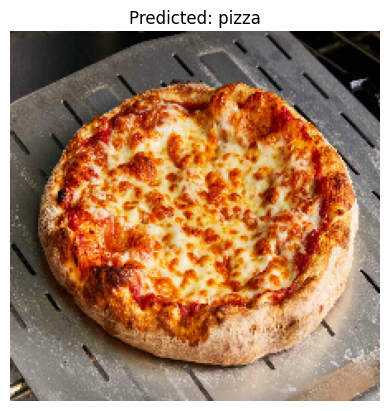

In [55]:
# Test Our Model on a Custom image
pred_and_plot(model_8 , "/content/drive/MyDrive/Datasets/pizza_steak/Prediction Testing Images/classic-cheese-pizza-FT-RECIPE0422-31a2c938fc2546c9a07b7011658cfd05.jpg" , class_names)

1/1 [==============================] - 0s 17ms/step


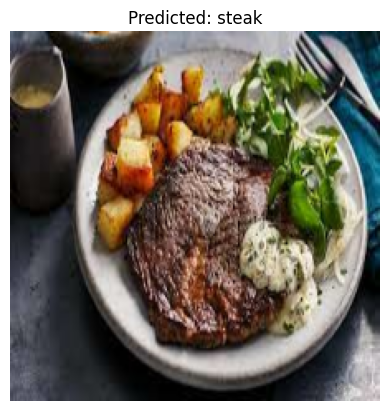

In [56]:
pred_and_plot(model_8 , "/content/drive/MyDrive/Datasets/pizza_steak/Prediction Testing Images/download.jpeg" ,class_names )

# Saving the Model 8 

In [59]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Datasets/pizza_steak")
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [60]:
# Save our model trained on 1000 images
save_model(model_8, suffix="pizza-and-steak-model")

Saving model to: /content/drive/MyDrive/Datasets/pizza_steak-pizza-and-steak-model.h5...


'/content/drive/MyDrive/Datasets/pizza_steak-pizza-and-steak-model.h5'